In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

#for edv (Base)
def EDV(alt,state):
    A = np.random.randint(-100,100,size=(alt,state)) #declare payoff and random prob vector
    pj = np.random.normal(state,size=(state,1))
    pj=pj/np.sum(pj)
    
    M = A@pj #EDV
    m=float(max(M))
    Ap = [item for sublist in A for item in sublist]
    D=[]
    for i in Ap:
        if i>=m:
            D.append(0)
        else:
            D.append(m-i)
    D=np.array(D).reshape(alt,state) #dissapointment matrix
    
    edv = D@pj
    m_edv= float(min(edv)) #EVWPI and EVPI
    ee= D.min(axis=0)
    ee=np.array(ee).reshape(1,state)
    
    evwpi=ee@pj
    evpi = m_edv-evwpi
    return evpi
    

In [2]:
#for edv and erv
def EDV_ERV(alt,state):
    A = np.random.randint(-100,100,size=(alt,state)) #declare payoff and random prob vector
    pj = np.random.normal(state,size=(state,1))
    pj=pj/np.sum(pj)
    
    M = A@pj #EDV
    m=float(max(M))
    Ap = [item for sublist in A for item in sublist]
    D=[]
    for i in Ap:
        if i>=m:
            D.append(0)
        else:
            D.append(m-i)
    D=np.array(D).reshape(alt,state) #dissapointment matrix
    
    edv = D@pj
    m_edv= float(min(edv)) #EVWPI and EVPI
    ee= D.min(axis=0)
    ee=np.array(ee).reshape(1,state)
    
    evwpi=ee@pj
    evpi_edv = m_edv-float(evwpi)
    
    R=[] #regret
    for i in range(0,state):
        regret=(max(A[:,i])-A[:,i])
        R.append(regret)
    K=[item for sublist in R for item in sublist]
    RE=np.array(K).reshape(state,alt)
    REG=np.transpose(RE)
    
    e_reg = REG@pj   #EVWPI AND EVPI FOR REGRET
    mreg = float(min(e_reg)) 
    eerv = A.max(axis=0)
    evwpier=np.array(eerv).reshape(1,state)
    evwpi_er=evwpier@pj
    evpi_er=float(evwpi_er)-m
    
    return evpi_edv, evpi_er
    
    

In [3]:
#declaring a repeat function
def repeat(alg,alt,state,times):
    DV=[]
    for i in range(times):
        output=alg(alt,state)
        DV.append(output)
    return DV

In [4]:
altt= int(input('enter number of alternatives:'))
statee=int(input('enter number of states:'))
iterr=int(input('enter number of iterations: '))


enter number of alternatives:3
enter number of states:5
enter number of iterations: 80


In [5]:
Data = repeat(EDV_ERV,altt,statee,iterr)

<AxesSubplot:>

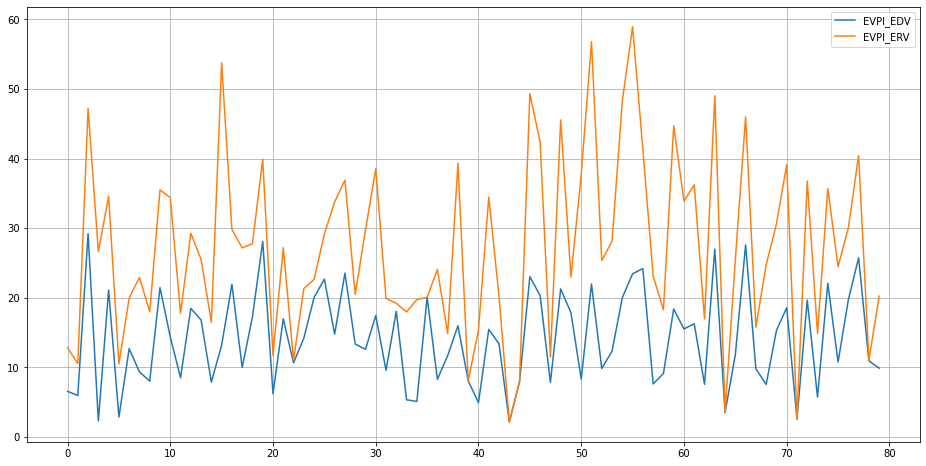

In [6]:
df=pd.DataFrame(Data,columns=['EVPI_EDV','EVPI_ERV']);df
df.plot(figsize=(16,8),grid=True)

In [7]:
df['iter']=list(range(0,iterr));df.head()

,EVPI_EDV,EVPI_ERV,iter
0,6.573443,12.835454,0
1,5.973038,10.552191,1
2,29.217554,47.204282,2
3,2.314442,26.638726,3
4,21.121584,34.593036,4


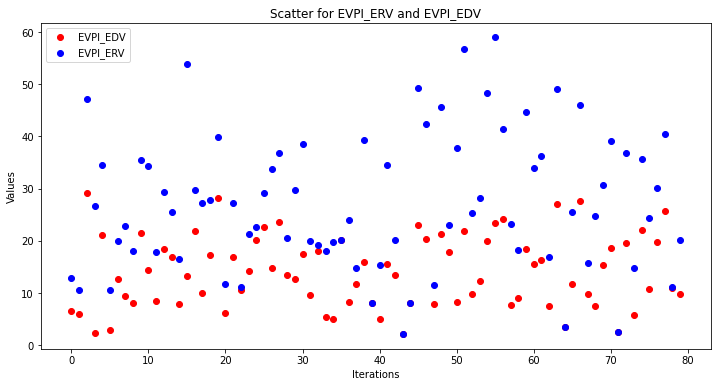

In [8]:
plt.figure(figsize=(12,6))
plt.scatter(df['iter'],df['EVPI_EDV'], color='red',label='EVPI_EDV')
plt.scatter(df['iter'],df['EVPI_ERV'], color='blue',label='EVPI_ERV')
plt.legend(loc='upper left')
plt.xlabel('Iterations')
plt.ylabel('Values')
plt.title('Scatter for EVPI_ERV and EVPI_EDV')
plt.show()

In [24]:
#rate of error
#df['error']=0
same = df['EVPI_EDV'] == df['EVPI_ERV']#same
error = df['EVPI_EDV']>df['EVPI_ERV'] #if expected regret value yields a lower evpi
exp = df['EVPI_EDV']<df['EVPI_ERV']#if otherwise (as expected).


df.loc[error,'error']=1 #hit 1 if error happens
df.loc[exp,'error']=0 #hit none, if only expectations are present
df.loc[same,'error']=0 #if same, then 0
df

,EVPI_EDV,EVPI_ERV,iter,error
0,6.573443,12.835454,0,0
1,5.973038,10.552191,1,0
2,29.217554,47.204282,2,0
3,2.314442,26.638726,3,0
4,21.121584,34.593036,4,0
...,...,...,...,...
75,10.783576,24.464164,75,0
76,19.710998,30.064736,76,0
77,25.753061,40.452086,77,0
78,10.951258,11.065588,78,0


In [25]:
print('rate of error is:',(error.sum()/len(error))*100,'%')

rate of error is: 6.25 %


In [26]:
error.sum()

5

In [27]:
len(error)

80

In [28]:
dfn=df[df.error==1];dfn

,EVPI_EDV,EVPI_ERV,iter,error
39,8.073413,8.073413,39,1
43,2.163862,2.163862,43,1
44,8.012303,8.012303,44,1
64,3.526645,3.526645,64,1
71,2.578657,2.578657,71,1
